# Libraries

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# metrics
from sklearn.metrics import make_scorer, mean_absolute_error, median_absolute_error, mean_squared_error

# cross-validation
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, KFold, GridSearchCV, RandomizedSearchCV

# preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

# regression models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Load data

In [154]:
df = pd.read_csv('data/house_pricing_features.csv')
df

,LotArea,Street,LandSlope,YearBuilt,YearRemodAdd,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,...,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
0,8450,1.0,0.0,2003,2003,856,1.0,856,854,1710,...,0,0,1,0,1,0,0,0,0,0
1,9600,1.0,0.0,1976,1976,1262,1.0,1262,0,1262,...,0,0,1,0,1,0,0,0,0,0
2,11250,1.0,0.0,2001,2002,920,1.0,920,866,1786,...,0,0,1,0,1,0,0,0,0,0
3,9550,1.0,0.0,1915,1970,756,1.0,961,756,1717,...,0,0,1,0,0,0,0,0,1,0
4,14260,1.0,0.0,2000,2000,1145,1.0,1145,1053,2198,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,1.0,0.0,1999,2000,953,1.0,953,694,1647,...,0,0,1,0,1,0,0,0,0,0
1456,13175,1.0,0.0,1978,1988,1542,1.0,2073,0,2073,...,0,0,1,0,1,0,0,0,0,0
1457,9042,1.0,0.0,1941,2006,1152,1.0,1188,1152,2340,...,0,0,1,0,1,0,0,0,0,0
1458,9717,1.0,0.0,1950,1996,1078,1.0,1078,0,1078,...,0,0,0,0,1,0,0,0,0,0


# Train / test split
Keep test split totally isolated from cross-validation.

In [155]:
target_ft = 'SalePrice'
test_size = 0.2
shuffle = True

In [156]:
X = df.drop(target_ft, axis=1)
y = df[target_ft]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=shuffle, random_state=42)

# Cross-validation

In [157]:
main_kfold = KFold(5, shuffle=True, random_state=42)

In [158]:
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MedAE': make_scorer(median_absolute_error),
    'MSE': make_scorer(mean_squared_error)
}

In [159]:
def print_reg_scores(cv_model):
    print('Train MAE:', cv_model['train_MAE'].mean().round(1))
    print('Validation MAE:', cv_model['test_MAE'].mean().round(1))

def real_vs_pred(model, X_train, y_train):
    preds = cross_val_predict(model, X_train, y_train, cv=main_kfold, n_jobs=-1)
    x_line = np.arange(y_train.min(), y_train.max())
    plt.scatter(y_train, preds)
    plt.plot(x_line, x_line, color='orange')
    plt.xlabel('Real target')
    plt.ylabel('Predicted target')
    plt.show()

## Baseline 1

In [10]:
baseline1 = DummyRegressor(strategy='mean')
baseline1_cv = cross_validate(baseline1, X_train, y_train, cv=main_kfold,
                              scoring=scoring, return_train_score=True, n_jobs=-1)
print_reg_scores(baseline1_cv)

Train MAE: 56304.3
Validation MAE: 56318.2


## Baseline 2

In [11]:
baseline2 = LinearRegression(n_jobs=-1)
baseline2_cv = cross_validate(baseline2, X_train[['GrLivArea']], y_train, cv=main_kfold,
                              scoring=scoring, return_train_score=True, n_jobs=-1)
print_reg_scores(baseline2_cv)

Train MAE: 37327.4
Validation MAE: 37480.4


## LR

In [167]:
lr = LinearRegression(n_jobs=-1)
lr_cv = cross_validate(lr, X_train, y_train, cv=main_kfold,
                       scoring=scoring, return_train_score=True, n_jobs=-1)
print_reg_scores(lr_cv)

Train MAE: 22662.0
Validation MAE: 24317.4


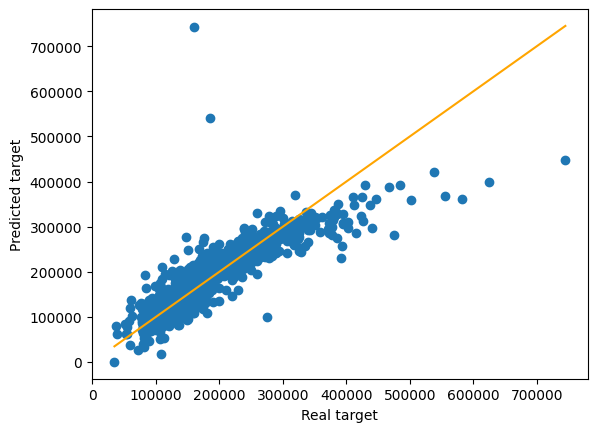

In [17]:
# real vs predicted
real_vs_pred(lr, X_train, y_train)

### Other metrics

Depending on your data and your objective, it may be a good idea to also check the performance of your models with another metric.

Is the performance better now? Why?

In [31]:
def print_reg_scores(cv_model):
    print('Train MAE:', cv_model['train_MAE'].mean().round(1))
    print('Validation MAE:', cv_model['test_MAE'].mean().round(1))
    print()
    print('Train MedAE:', cv_model['train_MedAE'].mean().round(1))
    print('Validation MedAE:', cv_model['test_MedAE'].mean().round(1))

In [20]:
print_reg_scores(lr_cv)

Train MAE: 22662.0
Validation MAE: 24317.4

Train MedAE: 16580.5
Validation MedAE: 17195.0


### K Splits


In [21]:
lr = LinearRegression(n_jobs=-1)
val_scores = []
k_vals = range(2, 50)

for k in k_vals:
    if k % 10 == 0:
        print("K:", k)
    tmp_kfold = KFold(k, shuffle=True, random_state=12)
    lr_cv = cross_validate(lr, X_train, y_train, cv=tmp_kfold, scoring=scoring, return_train_score=True, n_jobs=-1)
    val_scores.append(lr_cv['test_MAE'].mean().round(1))

K: 10
K: 20
K: 30
K: 40


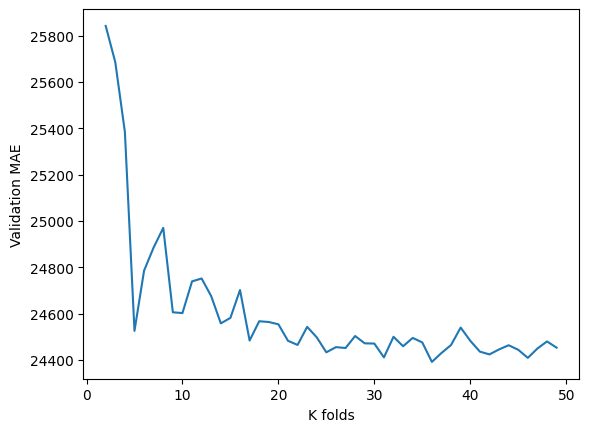

In [23]:
plt.plot(k_vals, val_scores)
plt.xlabel('K folds')
plt.ylabel('Validation MAE')
plt.show()

## kNN

### Check `n_neighbors` curves

In [56]:
nneighbors = range(1, 51)

scores = {
    'train_maes': [],
    'val_maes': [],
}

for n in nneighbors:
    knn = Pipeline([
        ('scale', RobustScaler()),
        ('knn', KNeighborsRegressor(n_neighbors=n, n_jobs=-1))
    ])

    knn_cv = cross_validate(knn, X_train, y_train, cv=main_kfold,
                            scoring=scoring, return_train_score=True, n_jobs=-1)
    scores['train_maes'].append(knn_cv['train_MAE'].mean().round(1))
    scores['val_maes'].append(knn_cv['test_MAE'].mean().round(1))

best_idx = np.argmin(scores['val_maes'])
print('Best Validation MAE:')
print('Train MAE:', scores['train_maes'][best_idx])
print('Validation MAE:', scores['val_maes'][best_idx])
print('N neighbors:', nneighbors[best_idx])

Best Validation MAE:
Train MAE: 21569.5
Validation MAE: 23975.6
N neighbors: 8


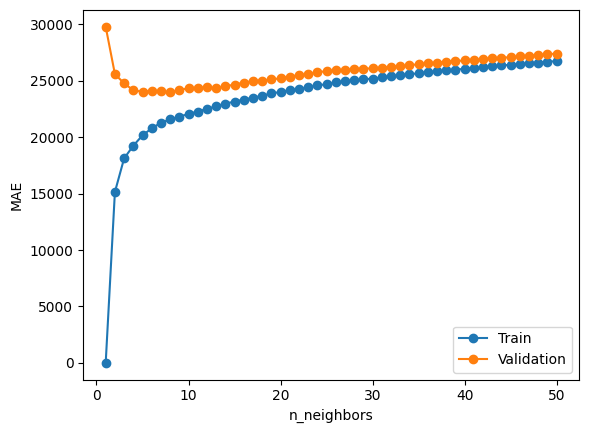

In [37]:
    plt.plot(nneighbors, scores[f'train_maes'], label='Train', marker='o')
    plt.plot(nneighbors, scores[f'val_maes'], label='Validation', marker='o')

    plt.xlabel('n_neighbors')
    plt.ylabel('MAE')
    plt.legend()
    plt.show()

### No data scaling

In [59]:
knn_no_pipe = KNeighborsRegressor(n_neighbors=8, n_jobs=-1)
knn_no_pipe_cv = cross_validate(knn_no_pipe, X_train, y_train, cv=main_kfold,
                                scoring=scoring, return_train_score=True, n_jobs=-1)
print_reg_scores(knn_no_pipe_cv)

Train MAE: 26344.8
Validation MAE: 29852.4

Train MedAE: 17279.1
Validation MedAE: 18452.5


### Heatmap

In [65]:
nneighbors = range(1, 11)
ps = range(1, 6)
scores = {
    'train_maes': [],
    'val_maes': []
}

for n in nneighbors:
    t = time.time()
    for p_ in ps:
        knn_pipe = Pipeline([
            ('scale', StandardScaler()),
            ('knn', KNeighborsRegressor(n_neighbors=n, p=p_, weights='distance', n_jobs=-1))
        ])

        knn_cv = cross_validate(knn_pipe, X_train, y_train, cv=main_kfold,
                                scoring=scoring, return_train_score=True, n_jobs=-1)
        scores['train_maes'].append(knn_cv['train_MAE'].mean().round(1))
        scores['val_maes'].append(knn_cv['test_MAE'].mean().round(1))
    print(n, round(time.time() - t, 1))

1 10.7
2 7.7
3 7.4
4 7.3
5 7.2
6 7.1
7 7.2
8 7.3
9 7.3
10 7.5


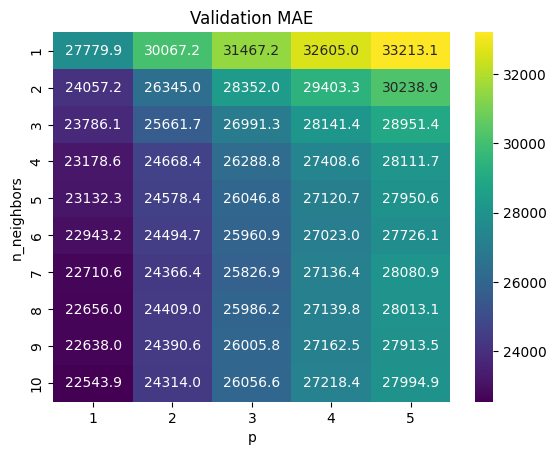

In [66]:
perf_matrix = np.array(scores['val_maes']).reshape(len(nneighbors), len(ps))
knn_perf = pd.DataFrame(perf_matrix, index=nneighbors, columns=ps)
sns.heatmap(knn_perf, annot=True, fmt='.1f', cmap='viridis')
plt.xlabel('p')
plt.ylabel('n_neighbors')
plt.title('Validation MAE')
plt.show()

### Hyperparameter tunning

In [72]:
def print_rs_reg_scores(rs_model, best_idx):
    print(rs_model.best_params_)
    print()
    print('Train MAE:', rs_model.cv_results_['mean_train_MAE'][best_idx].round(1))
    print('Validation MAE:', rs_model.cv_results_['mean_test_MAE'][best_idx].round(1))
    print()
    print('Train MedAE:', rs_model.cv_results_['mean_train_MedAE'][best_idx].round(1))
    print('Validation MedAE:', rs_model.cv_results_['mean_test_MedAE'][best_idx].round(1))

In [69]:
knn = Pipeline([
    ('scaler', None),
    ('knn', KNeighborsRegressor(n_neighbors=n, n_jobs=-1))
])

params = [{
    'scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()],
    'knn__n_neighbors': np.arange(1, 50),
    'knn__p': np.arange(1, 10),
    'knn__weights': ['uniform', 'distance']
}]

knn_rs = RandomizedSearchCV(knn,
                            n_iter=30,
                            param_distributions=params,
                            scoring=scoring,
                            cv=main_kfold,
                            refit=lambda x: x["mean_test_MAE"].argmin(),
                            return_train_score=True,
                            n_jobs=-1)

knn_rs.fit(X_train, y_train)

print_rs_reg_scores(knn_rs, knn_rs.best_index_)

{'scaler': RobustScaler(), 'knn__weights': 'distance', 'knn__p': 1, 'knn__n_neighbors': 16}

Train MAE: 14.0
Validation MAE: 23091.0

Train MedAE: 0.0
Validation MedAE: 14462.0


In [53]:
sorted(zip(range(30), knn_rs.cv_results_['params'], knn_rs.cv_results_['mean_train_MAE'], knn_rs.cv_results_['mean_test_MAE']), key=lambda x: x[3])[:5]

[(3,
  {'scaler': RobustScaler(),
   'knn__weights': 'distance',
   'knn__p': 1,
   'knn__n_neighbors': 16},
  14.005621042265455,
  23091.019827678632),
 (18,
  {'scaler': StandardScaler(),
   'knn__weights': 'uniform',
   'knn__p': 2,
   'knn__n_neighbors': 7},
  21530.779084741935,
  24855.713743338205),
 (29,
  {'scaler': RobustScaler(),
   'knn__weights': 'distance',
   'knn__p': 1,
   'knn__n_neighbors': 44},
  14.005621042265455,
  25124.813737363933),
 (15,
  {'scaler': RobustScaler(),
   'knn__weights': 'uniform',
   'knn__p': 3,
   'knn__n_neighbors': 11},
  22885.981759094917,
  25246.121192112605),
 (20,
  {'scaler': MinMaxScaler(),
   'knn__weights': 'uniform',
   'knn__p': 1,
   'knn__n_neighbors': 6},
  21202.32402119189,
  25367.283933702605)]

## DT

In [90]:
max_depth = range(1, 51)

scores = {
    'train_maes': [],
    'val_maes': [],
}

for n in max_depth:
    dt = DecisionTreeRegressor(max_depth=n)

    dt_cv = cross_validate(dt, X_train, y_train, cv=main_kfold,
                           scoring=scoring, return_train_score=True, n_jobs=-1)
    scores['train_maes'].append(dt_cv['train_MAE'].mean().round(1))
    scores['val_maes'].append(dt_cv['test_MAE'].mean().round(1))

best_idx = np.argmin(scores['val_maes'])
print('Best Validation MAE:')
print('Train MAE:', scores['train_maes'][best_idx])
print('Validation MAE:', scores['val_maes'][best_idx])
print('Max depth:', nneighbors[best_idx])

Best Validation MAE:
Train MAE: 15138.2
Validation MAE: 27240.6
Max depth: 7


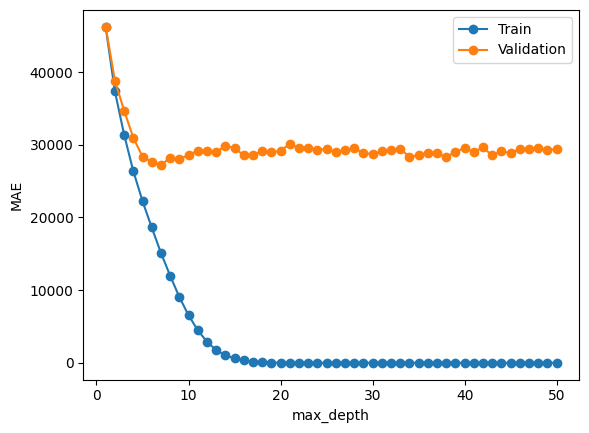

In [91]:
    plt.plot(max_depth, scores[f'train_maes'], label='Train', marker='o')
    plt.plot(max_depth, scores[f'val_maes'], label='Validation', marker='o')

    plt.xlabel('max_depth')
    plt.ylabel('MAE')
    plt.legend()
    plt.show()

### Hyperparameter tunning

In [86]:
dt = DecisionTreeRegressor()

params = {
    'max_depth': list(range(1, 30)) + [None],
    'min_samples_split': range(2, 100),
    'min_samples_leaf': range(1, 100),
    'max_leaf_nodes': range(2, 50),
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],
}

dt_rs = RandomizedSearchCV(dt,
                           param_distributions=params,
                           n_iter=100,
                           scoring=scoring,
                           cv=main_kfold,
                           return_train_score=True,
                           refit=lambda x: x["mean_test_MAE"].argmin(),
                           n_jobs=-1)

dt_rs.fit(X_train, y_train)

print_rs_reg_scores(dt_rs, dt_rs.best_index_)

{'min_samples_split': 31, 'min_samples_leaf': 16, 'max_leaf_nodes': 35, 'max_depth': None, 'criterion': 'absolute_error'}

Train MAE: 20704.1
Validation MAE: 25732.4

Train MedAE: 12088.7
Validation MedAE: 16425.4


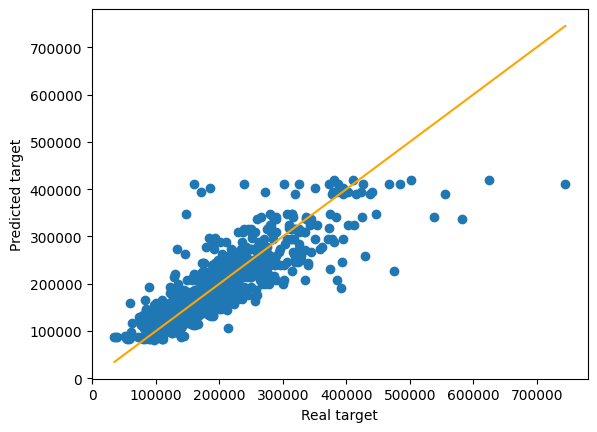

In [87]:
# real vs predicted
real_vs_pred(dt_rs.best_estimator_, X_train, y_train)

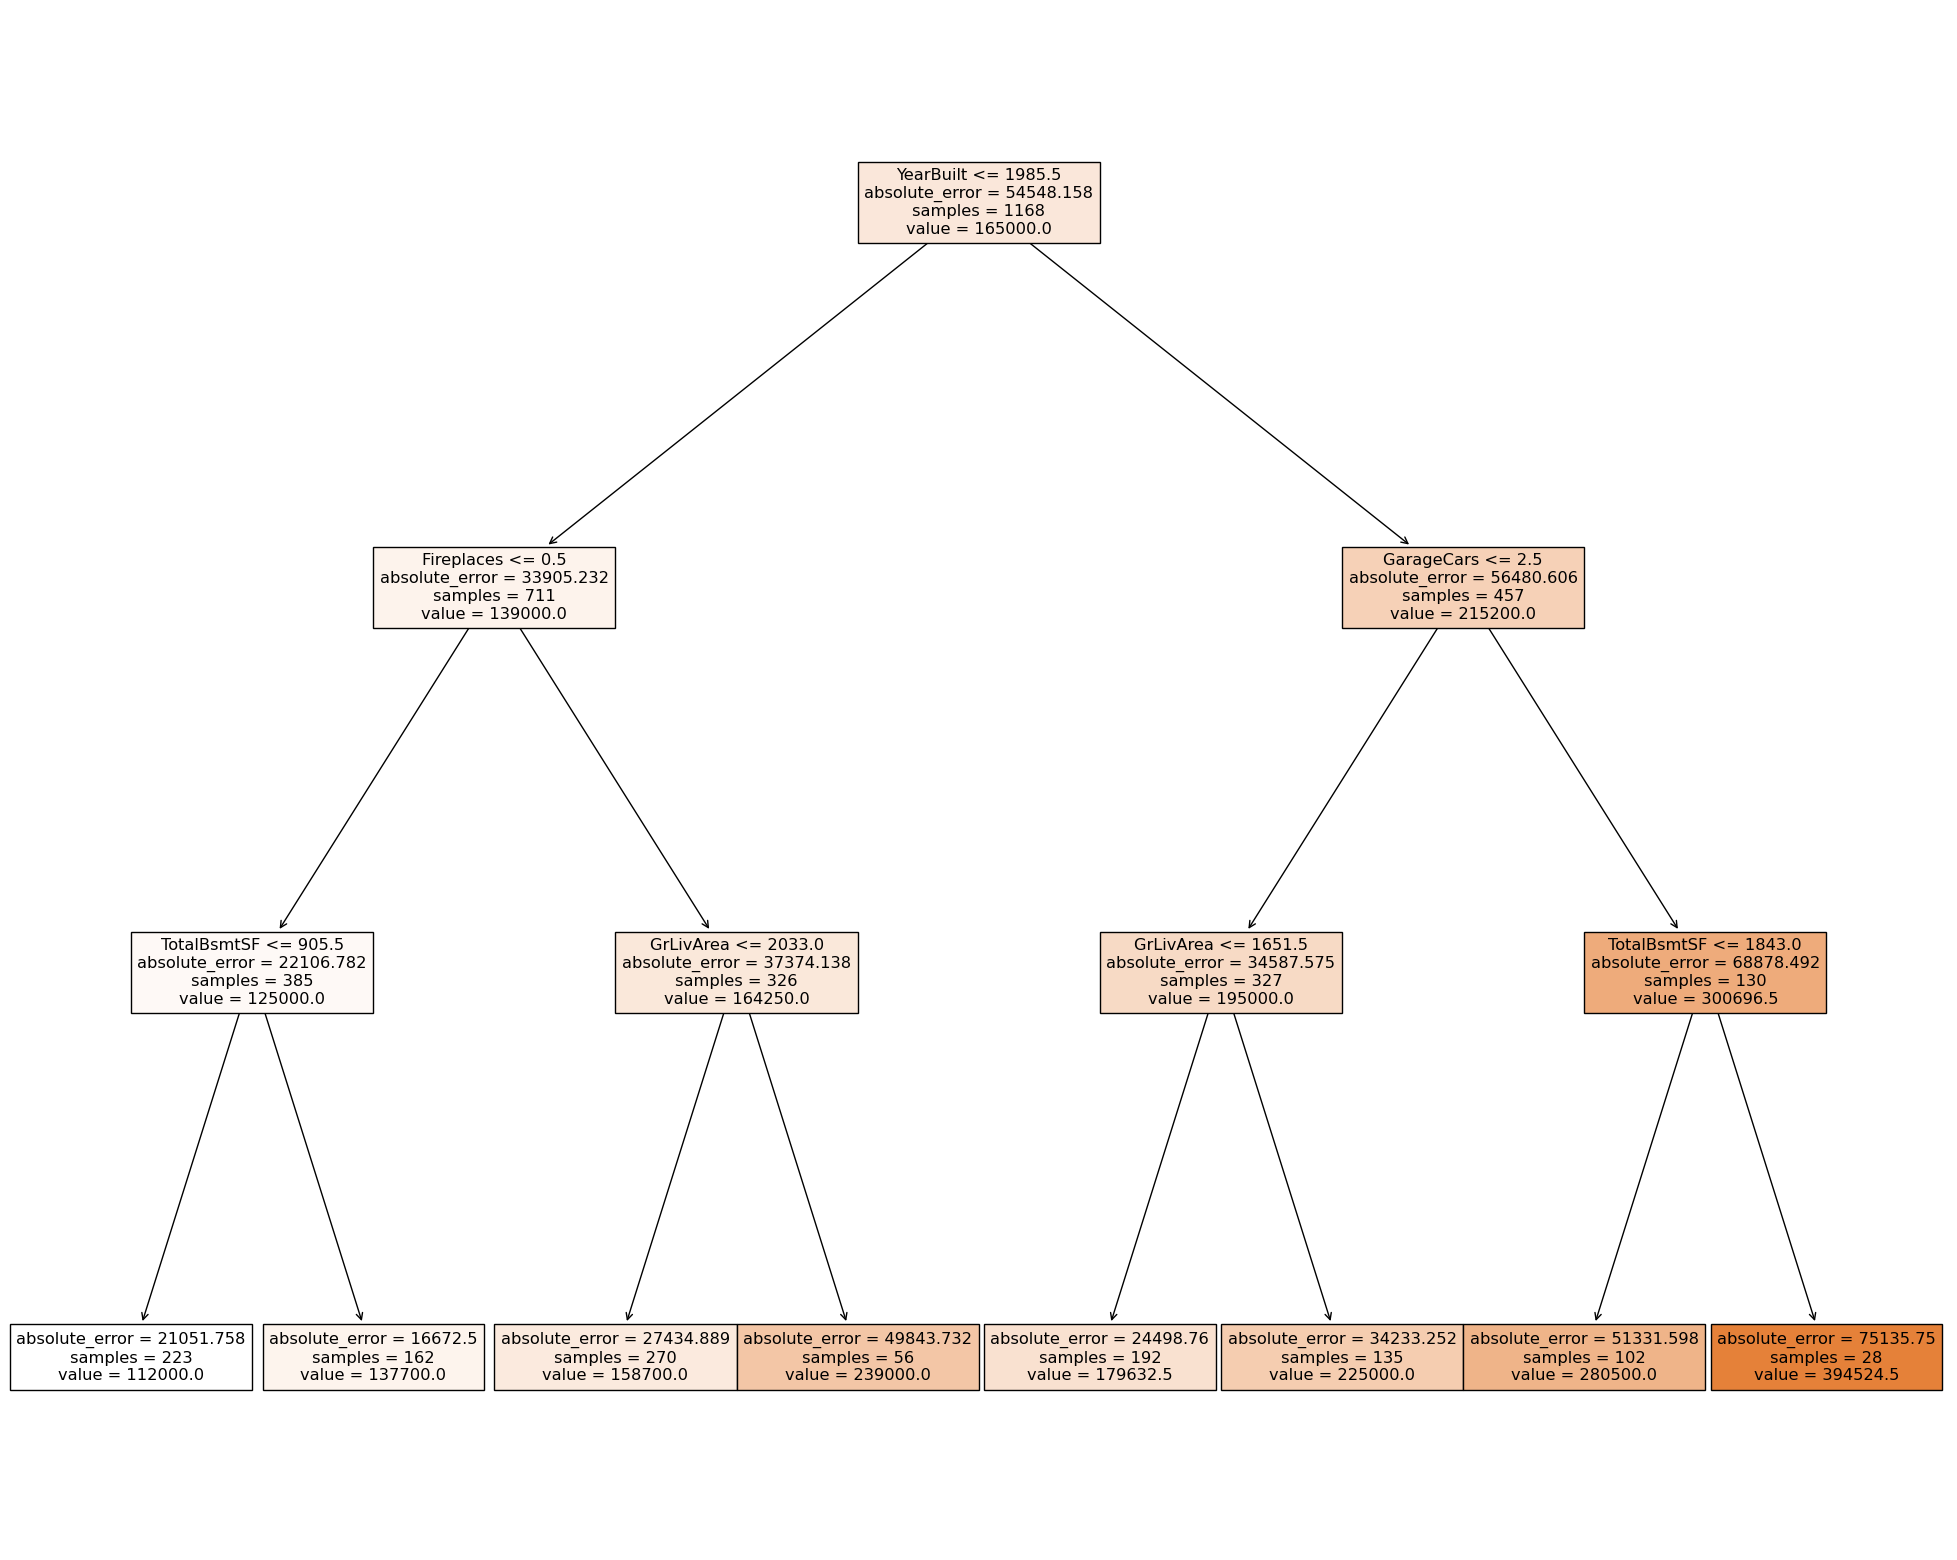

In [88]:
dt = DecisionTreeRegressor(**{'min_samples_split': 31, 'min_samples_leaf': 16, 'max_leaf_nodes': 35,
                              'max_depth': 3, 'criterion': 'absolute_error'})
dt.fit(X_train, y_train)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=X_train.columns,  
                   class_names=y_train,
                   filled=True)

## RF

In [106]:
rf = RandomForestRegressor(n_jobs=-1, random_state=42)

params = [{
    'n_estimators': [100, 200, 300],
    'criterion': ['friedman_mse', 'squared_error', 'absolute_error'],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_depth': [3, 4, 5, 6, 8, 10, 20, 50],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.7, 0.9],
    'max_samples': [None, 0.5, 0.7, 0.9],
    'max_leaf_nodes': [None, 5, 10, 20],
    'min_weight_fraction_leaf': np.arange(0, 0.51, 0.1),
}]

rf_rs = RandomizedSearchCV(rf,
                           n_iter=200,
                           param_distributions=params,
                           scoring=scoring,
                           cv=main_kfold,
                           refit=lambda x: x["mean_test_MAE"].argmin(),
                           return_train_score=True,
                           n_jobs=-1)

rf_rs.fit(X_train, y_train)

print_rs_reg_scores(rf_rs, rf_rs.best_index_)

{'n_estimators': 300, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_samples': 0.9, 'max_leaf_nodes': None, 'max_features': 0.5, 'max_depth': 8, 'criterion': 'absolute_error'}

Train MAE: 14156.5
Validation MAE: 20156.5

Train MedAE: 8889.6
Validation MedAE: 12517.1


In [111]:
sorted(zip(range(200), rf_rs.cv_results_['params'], rf_rs.cv_results_['mean_train_MAE'], rf_rs.cv_results_['mean_test_MAE']), key=lambda x: x[3])[:3]

[(185,
  {'n_estimators': 300,
   'min_weight_fraction_leaf': 0.0,
   'min_samples_split': 10,
   'min_samples_leaf': 2,
   'max_samples': 0.9,
   'max_leaf_nodes': None,
   'max_features': 0.5,
   'max_depth': 8,
   'criterion': 'absolute_error'},
  14156.45794059438,
  20156.519681779835),
 (84,
  {'n_estimators': 300,
   'min_weight_fraction_leaf': 0.0,
   'min_samples_split': 20,
   'min_samples_leaf': 2,
   'max_samples': 0.5,
   'max_leaf_nodes': None,
   'max_features': 'sqrt',
   'max_depth': 10,
   'criterion': 'friedman_mse'},
  19180.255099705842,
  21886.00491968843),
 (181,
  {'n_estimators': 100,
   'min_weight_fraction_leaf': 0.0,
   'min_samples_split': 2,
   'min_samples_leaf': 4,
   'max_samples': 0.5,
   'max_leaf_nodes': 20,
   'max_features': 0.9,
   'max_depth': 10,
   'criterion': 'friedman_mse'},
  18834.93386708171,
  22040.678034673932)]

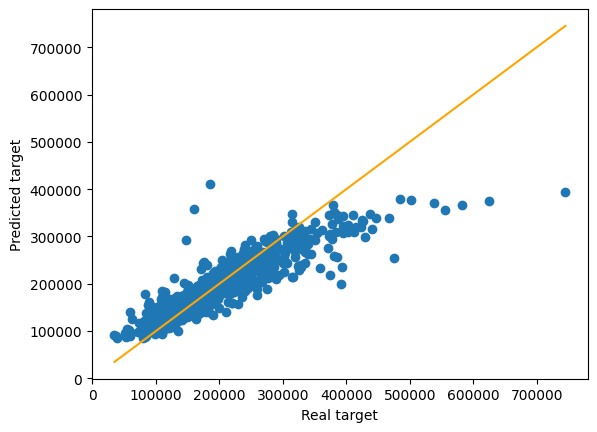

In [99]:
# real vs predicted
real_vs_pred(rf_rs.best_estimator_, X_train, y_train)

In [102]:
rf_rs.best_estimator_.fit(X_train, y_train)

rf_ft_imps = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_rs.best_estimator_.feature_importances_
}).sort_values('importance', ascending=False).round(3)

rf_ft_imps.head(20)

,feature,importance
9,GrLivArea,0.116
19,GarageArea,0.081
5,TotalBsmtSF,0.074
3,YearBuilt,0.074
7,1stFlrSF,0.068
18,GarageCars,0.056
16,GarageYrBlt,0.054
17,GarageFinish,0.044
8,2ndFlrSF,0.042
11,FullBath,0.041


## GBDT

In [118]:
gb = GradientBoostingRegressor()

params = {
    'loss': ['quantile', 'squared_error', 'absolute_error', 'huber'],
    'learning_rate': np.logspace(-3, 0, 10),
    'n_estimators': [20, 50, 100, 200, 300, 500, 1000],
    'subsample': [0.5, 0.7, 0.9, 1.0],
    'criterion': ['friedman_mse', 'squared_error'],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 8, 10, 20],
    'min_impurity_decrease': [0.0, 0.01, 0.1],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.7],
    'max_leaf_nodes': [None, 5, 10, 20],
    'validation_fraction': [0.1, 0.2],
}

gb_rs = RandomizedSearchCV(gb,
                           n_iter=50,
                           param_distributions=params,
                           scoring=scoring,
                           cv=main_kfold,
                           refit=lambda x: x["mean_test_MAE"].argmin(),
                           return_train_score=True,
                           n_jobs=-1)

gb_rs.fit(X_train, y_train)

print_rs_reg_scores(gb_rs, gb_rs.best_index_)

{'validation_fraction': 0.1, 'subsample': 0.7, 'n_estimators': 1000, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 2, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 10, 'max_features': None, 'max_depth': 20, 'loss': 'squared_error', 'learning_rate': 0.021544346900318832, 'criterion': 'friedman_mse'}

Train MAE: 6638.6
Validation MAE: 18552.5

Train MedAE: 5346.8
Validation MedAE: 11620.3


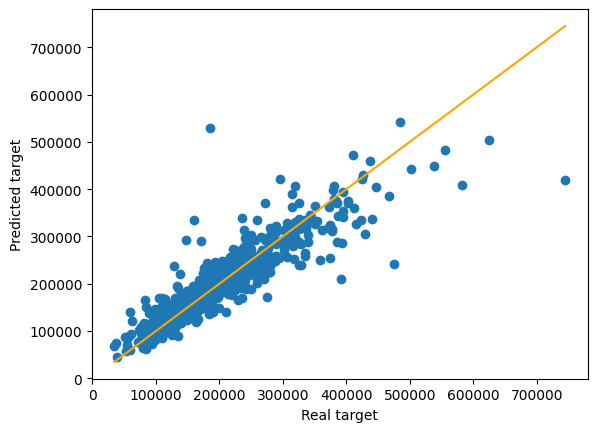

In [119]:
# real vs predicted
real_vs_pred(gb_rs.best_estimator_, X_train, y_train)

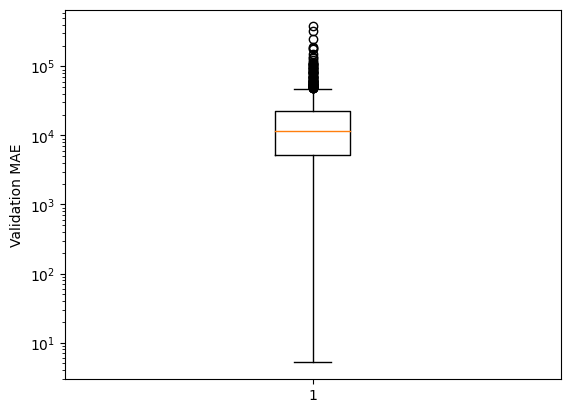

In [121]:
y_val_pred = cross_val_predict(gb_rs.best_estimator_, X_train, y_train, cv=main_kfold, n_jobs=-1)

plt.boxplot(abs(y_train - y_val_pred))
plt.ylabel('Validation MAE')
plt.yscale('log')
plt.show()

## Remove outliers experiment

In [128]:
X2 = df[df['SalePrice'] < 300_000].drop(target_ft, axis=1)
y2 = df[df['SalePrice'] < 300_000][target_ft]
print(f'Dropping {1 - (len(X2) / len(df)):.1%} of the data')

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=test_size, shuffle=shuffle, random_state=42)

Dropping 7.9% of the data


In [131]:
gb = GradientBoostingRegressor()

params = {
    'loss': ['quantile', 'squared_error', 'absolute_error', 'huber'],
    'learning_rate': np.logspace(-3, 0, 10),
    'n_estimators': [20, 50, 100, 200, 300, 500, 1000],
    'subsample': [0.5, 0.7, 0.9, 1.0],
    'criterion': ['friedman_mse', 'squared_error'],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 8, 10, 20],
    'min_impurity_decrease': [0.0, 0.01, 0.1],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.7],
    'max_leaf_nodes': [None, 5, 10, 20],
    'validation_fraction': [0.1, 0.2],
}

gb_rs_2 = RandomizedSearchCV(gb,
                           n_iter=50,
                           param_distributions=params,
                           scoring=scoring,
                           cv=main_kfold,
                           refit=lambda x: x["mean_test_MAE"].argmin(),
                           return_train_score=True,
                           n_jobs=-1)

gb_rs_2.fit(X_train2, y_train2)

print_rs_reg_scores(gb_rs_2, gb_rs_2.best_index_)

{'validation_fraction': 0.1, 'subsample': 1.0, 'n_estimators': 500, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 5, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.01, 'max_leaf_nodes': 20, 'max_features': None, 'max_depth': 5, 'loss': 'huber', 'learning_rate': 0.021544346900318832, 'criterion': 'friedman_mse'}

Train MAE: 6052.6
Validation MAE: 15361.5

Train MedAE: 4327.7
Validation MedAE: 11518.0


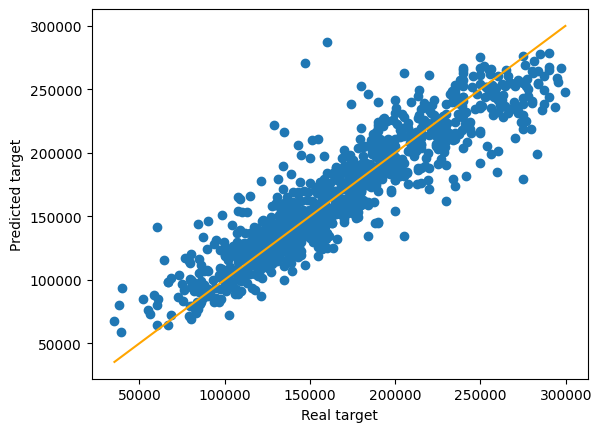

In [132]:
# real vs predicted
real_vs_pred(gb_rs_2.best_estimator_, X_train2, y_train2)

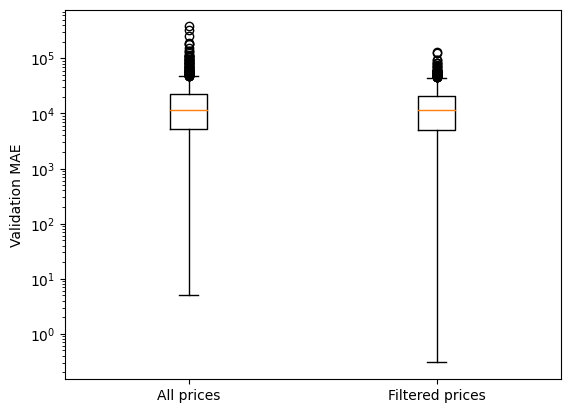

In [134]:
pred_diff = abs(y_train - y_val_pred)
y_val_pred2 = cross_val_predict(gb_rs_2.best_estimator_, X_train2, y_train2, cv=main_kfold, n_jobs=-1)
pred_diff2 = abs(y_train2 - y_val_pred2)

plt.boxplot([pred_diff, pred_diff2], labels=['All prices', 'Filtered prices'])
plt.ylabel('Validation MAE')
plt.yscale('log')
plt.show()

## Summary

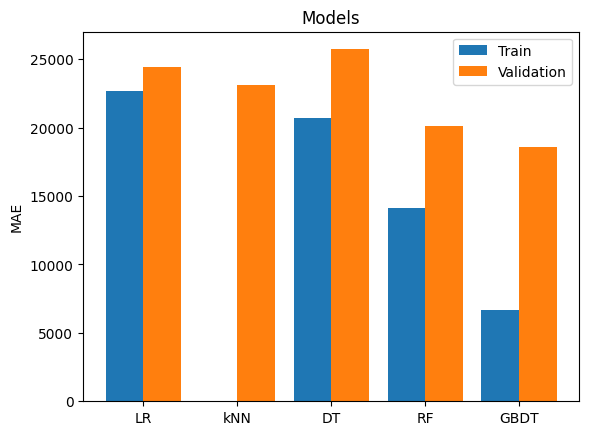

In [150]:
models = [
    ('LR', lr_cv),
    ('kNN', knn_rs),
    ('DT', dt_rs),
    ('RF', rf_rs),
    ('GBDT', gb_rs),
]

y_train_axis = []
y_valid_axis = []

for name, model in models:
    if name == 'LR':
        y_train_axis.append(model['train_MAE'].mean())
        y_valid_axis.append(model['test_MAE'].mean())
    else:
        y_train_axis.append(model.cv_results_['mean_train_MAE'][model.best_index_])
        y_valid_axis.append(model.cv_results_['mean_test_MAE'][model.best_index_])

x_axis = np.arange(len(models))
plt.bar(x_axis - 0.2, y_train_axis, 0.4, label = 'Train')
plt.bar(x_axis + 0.2, y_valid_axis, 0.4, label = 'Validation')
  
plt.xticks(x_axis, [name for name, _ in models])
plt.ylabel('MAE')
plt.title('Models')
plt.legend()
plt.show()

# Test

Choose the most promising models and test them.

kNN
Train MAE: 17.25
Test MAE: 26148.567463300624
Test MedAE: 13866.52004028605

RF
Train MAE: 14231.01665097032
Test MAE: 19522.645696347034
Test MedAE: 11170.000833333339

GBDT
Train MAE: 7411.811841391574
Test MAE: 17567.638945900402
Test MedAE: 10879.47037296788



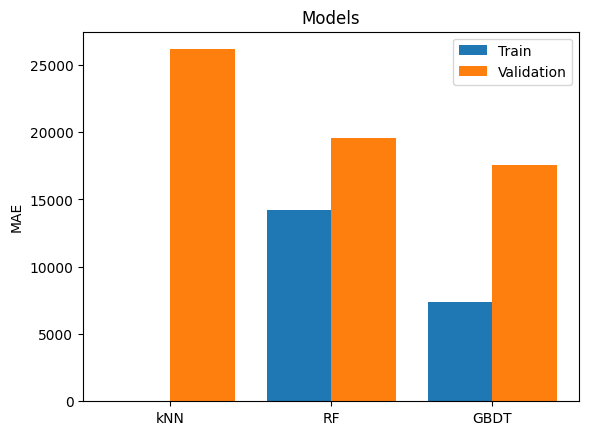

In [149]:
models = [
    ('kNN', knn_rs),
    ('RF', rf_rs),
    ('GBDT', gb_rs),
]

y_train_axis = []
y_valid_axis = []

for name, model in models:
    model.best_estimator_.fit(X_train, y_train)
    y_train_pred = model.best_estimator_.predict(X_train)
    y_test_pred = model.best_estimator_.predict(X_test)
    y_train_axis.append(mean_absolute_error(y_train, y_train_pred))
    y_valid_axis.append(mean_absolute_error(y_test, y_test_pred))
    print(name)
    print('Train MAE:', mean_absolute_error(y_train, y_train_pred))
    print('Test MAE:', mean_absolute_error(y_test, y_test_pred))
    print('Test MedAE:', median_absolute_error(y_test, y_test_pred))
    print()

x_axis = np.arange(len(models))
plt.bar(x_axis - 0.2, y_train_axis, 0.4, label = 'Train')
plt.bar(x_axis + 0.2, y_valid_axis, 0.4, label = 'Validation')
  
plt.xticks(x_axis, [name for name, _ in models])
plt.ylabel('MAE')
plt.title('Models')
plt.legend()
plt.show()

# Save Model

Saving the model as a `pickle`, meaning that the Python's object (which is a trained model) is stored as a file in the specified path.

`gb_rs` is an object of `RandomizedSearchCV` type. Out of all the hyperparameters it tried, it stored the best model in the `best_estimator_` attribute.

Then, `gb_rs.best_estimator_` is a `GradientBoostingRegressor` object, which is trained with all training data (X_train and y_train), as you can see in the cell above.

If we think our model is robust enough, one good option is to train it with all the available data we have. However, the absence of additional data to test the model introduces the risk of deploying an unvalidated model to production. To mitigate this risk, we can employ thorough cross-validation on the complete dataset. By using a big number of splits, we ensure a more exhaustive assessment of the model's performance. If the model consistently performs well across numerous cross-validation folds, we can be more assured that expanding the entire dataset will not lead to adverse outcomes in a production environment. This approach does not entirely eliminate the risk, but it significantly bolsters our confidence in the model's generalizability.

In [153]:
import pickle

In [163]:
type(gb_rs)

sklearn.model_selection._search.RandomizedSearchCV

In [162]:
type(gb_rs.best_estimator_)

sklearn.ensemble._gb.GradientBoostingRegressor

In [173]:
final_cv = cross_validate(gb_rs.best_estimator_, X, y, cv=200,
                          scoring=scoring, return_train_score=True, n_jobs=-1)
print_reg_scores(final_cv)

Train MAE: 8329.2
Validation MAE: 17737.9


As we get a good average performance in the cross-validation with all the data, we decide to finally train our model with the whole dataset.

In [ ]:
gb_rs.best_estimator_.fit(X, y)

And store it in a file:

In [164]:
with open('model_gbdt.pkl', 'wb') as f:
    pickle.dump(gb_rs.best_estimator_, f)

# Load Model

We can load and use a trained model stored in a `pickle` file.

`gb` is now a `GradientBoostingRegressor` object that is already trained with X_train and y_train, as this is the model that was previously stored.

We can load and use this object for predicting sale prices of any house data we want, as long as the features are the same as the trained model.

In [165]:
with open('model_gbdt.pkl', 'rb') as f:
    gb = pickle.load(f)

In [170]:
type(gb)

sklearn.ensemble._gb.GradientBoostingRegressor

In [169]:
gb.predict(X_test.iloc[:10])

array([165794.8044045 , 218250.65576158, 160358.16417182, 168217.31857123,
       216746.62599792, 149139.11971734, 179438.61605601, 171022.33562772,
       148942.62918702, 162318.50950057])